In [106]:
from MLimports2 import *
exec(MLimports())

# Arterial roads

In [1044]:
X,Y = getBFS(part=[5,90],dataset='a')

# cnd = X.monthidx >= (X.monthidx.max()-10)

# Xtr = X[cnd]
# Xte = X[~cnd]
# Ytr = Y[cnd]
# Yte = Y[~cnd]

In [1045]:
from sklearn.linear_model import Ridge as LR
from sklearn.tree import DecisionTreeRegressor as DT
from ngboost import NGBRegressor

In [909]:
class GB:
    def __init__(self,base,params):
        self.est = [base(**params) for i in range(1)]
    def fit(self,X,Y):
        
        self.est[0].fit(X,Y)
        preds = self.est[0].predict(X)
        
        
        
        for i in range(1,len(self.est)):
            self.est[i].fit(X, Y-preds )
            preds += self.est[i].predict(X)
            
            
    def predict(self,X):
        
#         MAPE=[]
#         ITER=[]
        
#         ITER.append(0)
        
        preds = self.est[0].predict(X)
        
#         MAPE.append(mape(Yte,self.est[0].predict(Xte)))
#         
        for i in range(1,len(self.est)):
#             ITER.append(i)
#             MAPE.append(mape(Yte,self.est[i].predict(Xte)))
            preds+=self.est[i].predict(X)
        
#         plt.plot(ITER,MAPE)
        return preds

In [925]:
reg = GB(DT,{'max_depth':1})
# reg = XGBRegressor(max_depth=7)

In [926]:
reg.fit(Xtr.values,np.log1p(Ytr))

In [927]:
mape(Yte,np.expm1(reg.predict(Xte.values)))

36.74072645978327

(array([1.000e+00, 8.000e+00, 3.055e+03, 1.600e+02, 9.290e+02, 2.080e+02,
        3.300e+02, 1.240e+02, 2.130e+02, 1.360e+02]),
 array([-33.47429068, -25.47429068, -17.47429068,  -9.47429068,
         -1.47429068,   6.52570932,  14.52570932,  22.52570932,
         30.52570932,  38.52570932,  46.52570932]),
 <a list of 10 Patch objects>)

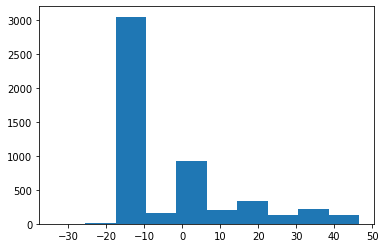

In [928]:
plt.hist(Yte-np.expm1(reg.predict(Xte)))

In [941]:
mape(Yte,29*np.ones(len(Yte)))

18.53885627069106

In [1080]:
X,Y = getBFS(part=[0,45],dataset='a')
Xtr,Xte,Ytr,Yte = train_test_split(X,Y,test_size=0.2)

In [1081]:
mape(Yte,np.median(Y)*np.ones(len(Yte)))

69.10328859292345

In [1082]:
reg = XGBRegressor(max_depth=9)

In [1083]:
reg.fit(np.random.random(size=len(Ytr)).reshape(-1,1),np.log1p(Ytr))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1084]:
mape(Yte,np.expm1(reg.predict(np.random.random(size=len(Yte)).reshape(-1,1))))

108.17987982854855

In [1085]:
X.Source.unique()

AttributeError: 'DataFrame' object has no attribute 'Source'

In [1100]:
class MedianTree:
    def __init__(self):
        pass
    def fit(self,X,Y):
        
        self.S1M = np.median(Y[X.IncSource==0])
        self.S2M = np.median(Y[X.IncSource==1])
#         self.S3M = np.median(Y[X.IncSource==2])
        
    def predict(self,X):
        RES = []
        for i in range(len(X)):
            if X.iloc[i].IncSource==0:
                RES.append(self.S1M)
            if X.iloc[i].IncSource==1:
                RES.append(self.S2M)
#             if X.iloc[i].IncSource==2:
#                 RES.append(self.S3M)
        return np.array(RES)

In [1101]:
np.median(Y[X.IncSource==0])

24.0

In [1102]:
X.IncSource.unique()

array([0, 1])

In [1103]:
reg = MedianTree()

In [1104]:
reg.fit(X,Y)

In [1105]:
mape(Yte,reg.predict(Xte))

71.36476818947897

In [1107]:
for i in range(100):
    print(i,mape(Ytr,i*np.ones(len(Ytr))))

0 100.0
1 89.77533482869259
2 82.71522661941052
3 78.81967537215377
4 76.61188783797716
5 76.46106232911704
6 76.56340137721891
7 77.7205927459959
8 79.96277507318158
9 82.83786879277231
10 86.06457995258809
11 90.11407592253042
12 94.50879628833009
13 99.32545758239979
14 104.43423182681029
15 109.7690458542226
16 115.48360671707793
17 121.31683846600924
18 127.4106807882838
19 133.57484659860336
20 140.0721236680835
21 146.75927415528514
22 153.68753374435536
23 160.96101772928293
24 168.3445732607157
25 175.93909925628347
26 183.8121062645095
27 191.83116974790593
28 200.03776253275572
29 208.49299907890747
30 217.013709217377
31 225.68209868074103
32 234.5342366128679
33 243.5643808741086
34 252.70959993396835
35 261.9478941985937
36 271.3127707417
37 280.78313251687376
38 290.3048114319723
39 299.99304597665116
40 309.8273369965004
41 319.7882102948306
42 329.7799573196196
43 339.81691230100904
44 349.92746163035247
45 360.10993270883284
46 370.3345978801403
47 380.5592630514476
4

In [ ]:
#MeanTree
#randomly select feature and cat values (5 quantiles)
#estimate median values for all
#average(mean) such trees (which calculate mean, median, etc) and show the best result

(array([   6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5158.]),
 array([18.5661124 , 21.05693023, 23.54774806, 26.03856589, 28.52938371,
        31.02020154, 33.51101937, 36.0018372 , 38.49265502, 40.98347285,
        43.47429068]),
 <a list of 10 Patch objects>)

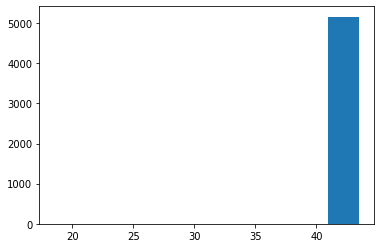

In [931]:
plt.hist(np.expm1(reg.predict(Xte)))

In [179]:
reg1=NGBRegressor(Base=XGBRegressor(max_depth=3,n_estimators=10))
# reg1=XGBRegressor(max_depth=7)
reg1.fit(Xtr,np.log1p(Ytr))

/home/agrigore/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[iter 0] loss=1.1769 val_loss=0.0000 scale=2.0000 norm=1.7484
[iter 100] loss=0.2289 val_loss=0.0000 scale=2.0000 norm=0.9693
[iter 200] loss=-0.4627 val_loss=0.0000 scale=2.0000 norm=0.8056
[iter 300] loss=-0.9810 val_loss=0.0000 scale=2.0000 norm=0.6590
[iter 400] loss=-1.3525 val_loss=0.0000 scale=2.0000 norm=0.5566


NGBRegressor(Base=XGBRegressor(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=3,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=10,
                               n_jobs=None, num_paral...
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                               verbosity=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
             learning_rate=0.01, minibatch_frac=1.0, n_estim

In [166]:
reg1.score(Xte,Yte)

0.0046515159595006406

In [180]:
R = -(reg1.predict(Xtr)-np.log1p(Ytr))

In [181]:
reg2=NGBRegressor(Base=XGBRegressor(max_depth=3))
reg2.fit(Xtr,R)

/home/agrigore/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[iter 0] loss=-0.9555 val_loss=0.0000 scale=2.0000 norm=1.2098
[iter 100] loss=-2.2008 val_loss=0.0000 scale=2.0000 norm=0.9410
[iter 200] loss=-3.5263 val_loss=0.0000 scale=4.0000 norm=1.9484
[iter 300] loss=-5.1411 val_loss=0.0000 scale=4.0000 norm=1.3738
[iter 400] loss=-5.6551 val_loss=0.0000 scale=2.0000 norm=0.3314


NGBRegressor(Base=XGBRegressor(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=3,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_para...
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                               verbosity=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
             learning_rate=0.01, minibatch_frac=1.0, n_estim

In [182]:
mape(Yte,np.expm1(reg1.predict(Xte)))

90.31694860377333

In [183]:
mape(Yte,reg1.predict(Xte)+reg2.predict(Xte))

85.10920963456097

(array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 514.]),
 array([-1.75734796e-04, -1.57906988e-04, -1.40079179e-04, -1.22251371e-04,
        -1.04423562e-04, -8.65957537e-05, -6.87679452e-05, -5.09401367e-05,
        -3.31123282e-05, -1.52845197e-05,  2.54328883e-06]),
 <a list of 10 Patch objects>)

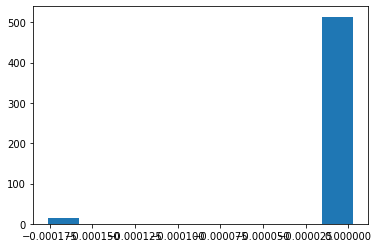

In [178]:
plt.hist(reg2.predict(X))

In [14]:
reg1.predict(X)

array([ 44.33845826,  62.07587887,  50.09550075,  70.0429974 ,
        65.77343144, 103.00923917, 110.91616231,  61.08725964,
        95.9360355 ,  50.51356585,  59.1807773 ,  59.26170556,
        55.89227067,  44.4209871 ,  84.098632  ,  73.46576956,
        83.34616061,  78.26245907,  68.60457678, 142.26425159,
        80.57803099,  64.12862507, 121.43222933, 114.97610784,
        51.74036382, 125.63365487,  65.87033995,  60.83656456,
        37.40034322,  57.73835131,  72.84440949,  61.05840645,
        55.06940099,  47.54162272,  44.51535309,  73.45790215,
        67.96217259,  70.21444632,  42.1380865 ,  65.45865686,
        65.08792502,  52.77182002,  47.98708991,  64.45183403,
        54.79395174,  90.92543953,  77.76410192,  41.09601802,
        46.09024365,  49.87243377,  37.88923317,  49.99856085,
        21.8844843 ,  36.5067377 ,  30.44276844,  43.27356794,
        48.02322972,  39.26251566,  44.51252367,  56.17523409,
        78.91282254,  15.22402511,  35.18490814,  38.36

In [73]:
Xtr = X[X.MonthOfYear>=10]
Xte = X[X.MonthOfYear<10]
Ytr = Y[X.MonthOfYear>=10]
Yte = Y[X.MonthOfYear<10]

In [74]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.0001,1.3,10000)), 
            'n_estimators' : range(20,400,1),
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.3, 1.0 ,10000),'colsample_bytree': np.linspace(0.0001,0.9999,10000),
            'min_child_weight':np.arange(2,31)
        }}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=800,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 8,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

Fitting 8 folds for each of 800 candidates, totalling 6400 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed:    0.3s
[Parallel(n_jobs=56)]: Done 1468 tasks      | elapsed:    1.7s
[Parallel(n_jobs=56)]: Done 3568 tasks      | elapsed:    3.4s


{'subsample': 0.7629562956295629, 'n_estimators': 99, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.004349532952816293, 'colsample_bytree': 0.3226677367736774}


[Parallel(n_jobs=56)]: Done 6400 out of 6400 | elapsed:    5.5s finished
/home/agrigore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [75]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
pred=pred

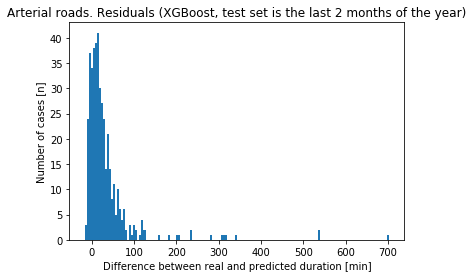

In [76]:
plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('Arterial roads. Residuals (XGBoost, test set is the last 2 months of the year)')
plt.savefig('aresid.eps',format='eps')

# San-Francisco

In [117]:
X,Y = getBFS(part=[0,60],dataset='sf')
Y=np.log1p(Y)

In [118]:
cnd = X.monthidx >= (X.monthidx.max()-10)

Xtr = X[cnd]
Xte = X[~cnd]
Ytr = Y[cnd]
Yte = Y[~cnd]

In [119]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.00001,1.3,100000)), 
            'n_estimators' : range(20,400,1),
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.3, 1.0 ,10000),'colsample_bytree': np.linspace(0.0001,0.9999,10000),
            'min_child_weight':np.arange(2,31)
        }}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=400,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 10,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed:    0.5s
[Parallel(n_jobs=56)]: Done 564 tasks      | elapsed:    2.7s
[Parallel(n_jobs=56)]: Done 1264 tasks      | elapsed:    5.3s
[Parallel(n_jobs=56)]: Done 2164 tasks      | elapsed:    9.0s
[Parallel(n_jobs=56)]: Done 3264 tasks      | elapsed:   13.3s


{'subsample': 0.7507750775077507, 'n_estimators': 47, 'min_child_weight': 22, 'max_depth': 7, 'learning_rate': 0.15514397277202366, 'colsample_bytree': 0.9199080008000801}


[Parallel(n_jobs=56)]: Done 4000 out of 4000 | elapsed:   16.6s finished
/home/agrigore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [120]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
pred=np.expm1(pred)

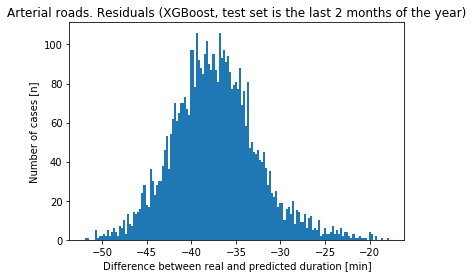

In [121]:
plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('Arterial roads. Residuals (XGBoost, test set is the last 2 months of the year)')
plt.savefig('sfresid.eps',format='eps')

In [137]:
X,Y = getBFS(part=[0,60],dataset='m')
Y=np.log1p(Y)

In [138]:
cnd = X.Month >= (X.Month.max()-10)

Xtr = X[cnd]
Xte = X[~cnd]
Ytr = Y[cnd]
Yte = Y[~cnd]

In [139]:
import tqdm
import multiprocessing

REG = {'name':'XGB','instance':XGBRegressor,'param':{
            'learning_rate' : np.log(np.linspace(1.00001,1.3,100000)), 
            'n_estimators' : range(50,400,1),
            'max_depth':range(2,15,1), ##MAR: start at 3 
            'subsample':np.linspace(0.3, 1.0 ,10000),'colsample_bytree': np.linspace(0.0001,0.9999,10000),
            'min_child_weight':np.arange(2,31)
        }}

search = RandomizedSearchCV(estimator = REG['instance'](),
                   param_distributions=REG['param'],
                   n_iter=400,
                   scoring=make_scorer(mape, greater_is_better=False),
                   n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                   cv = 10,
                   verbose = 1
                       )
search.fit(Xtr, Ytr)
print(search.best_params_)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=56)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=56)]: Done 338 tasks      | elapsed:    4.4s
[Parallel(n_jobs=56)]: Done 688 tasks      | elapsed:    8.9s
[Parallel(n_jobs=56)]: Done 1138 tasks      | elapsed:   14.3s
[Parallel(n_jobs=56)]: Done 1688 tasks      | elapsed:   21.0s
[Parallel(n_jobs=56)]: Done 2338 tasks      | elapsed:   31.9s
[Parallel(n_jobs=56)]: Done 3088 tasks      | elapsed:   42.1s


{'subsample': 0.78997899789979, 'n_estimators': 95, 'min_child_weight': 23, 'max_depth': 10, 'learning_rate': 0.019289305142881855, 'colsample_bytree': 0.011798829882988299}


[Parallel(n_jobs=56)]: Done 4000 out of 4000 | elapsed:   55.1s finished


In [142]:
reg = REG['instance'](**search.best_params_)
    
reg.fit(Xtr, Ytr)
pred = np.array(reg.predict(Xte)).ravel()
pred=np.expm1(pred)

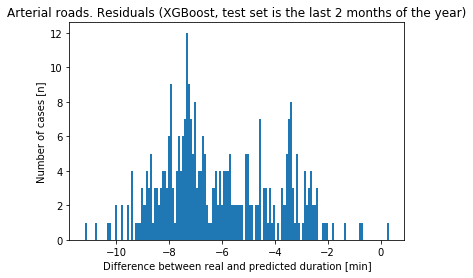

In [145]:
plt.hist(Yte-pred,bins=150)
plt.ylabel('Number of cases [n]')
plt.xlabel('Difference between real and predicted duration [min]')
plt.title('Arterial roads. Residuals (XGBoost, test set is the last 2 months of the year)')
plt.savefig('mresid.eps',format='eps')